In [304]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use("seaborn")

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [305]:
ass1=pd.read_csv("ass1(1).csv")
ass1

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,Ob1,1,2,3,4,5,6,7,8,9
1,Ob2,1,3,5,7,9,2,4,6,8
2,Ob3,2,3,5,7,1,4,6,8,9
3,Ob4,1,4,9,6,5,6,9,4,1
4,Ob5,2,8,3,7,4,6,1,5,9
5,Ob6,2,5,3,1,8,6,4,7,0
6,Ob7,2,5,6,9,3,1,4,7,9
7,Ob8,1,2,4,8,6,2,4,8,2
8,Ob9,1,3,4,6,7,9,2,5,8
9,Ob10,2,1,4,3,6,5,8,7,9


In [306]:
features=["V1","V2","V3","V4","V5","V6","V7","V8","V9"]
features2=["V2","V3","V4","V5","V6","V7","V8","V9"]

In [307]:
new_row = {'Unnamed: 0':"Ob11",'V1':2, 'V2':0, 'V3':0, 'V4':2, 'V5':3, 'V6':4, 'V7':1, 'V8':3, 'V9':1}
ass2 = ass1.append(new_row,ignore_index=True)
ass2.rename(columns={'Unnamed: 0':'Observation'}, inplace=True)
ass2

,Observation,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,Ob1,1,2,3,4,5,6,7,8,9
1,Ob2,1,3,5,7,9,2,4,6,8
2,Ob3,2,3,5,7,1,4,6,8,9
3,Ob4,1,4,9,6,5,6,9,4,1
4,Ob5,2,8,3,7,4,6,1,5,9
5,Ob6,2,5,3,1,8,6,4,7,0
6,Ob7,2,5,6,9,3,1,4,7,9
7,Ob8,1,2,4,8,6,2,4,8,2
8,Ob9,1,3,4,6,7,9,2,5,8
9,Ob10,2,1,4,3,6,5,8,7,9


In [308]:
X=ass2[features]
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,1,2,3,4,5,6,7,8,9
1,1,3,5,7,9,2,4,6,8
2,2,3,5,7,1,4,6,8,9
3,1,4,9,6,5,6,9,4,1
4,2,8,3,7,4,6,1,5,9
5,2,5,3,1,8,6,4,7,0
6,2,5,6,9,3,1,4,7,9
7,1,2,4,8,6,2,4,8,2
8,1,3,4,6,7,9,2,5,8
9,2,1,4,3,6,5,8,7,9


In [309]:
nr= np.array([2, 0, 0, 2, 3, 4, 1, 3, 1])
nr

array([2, 0, 0, 2, 3, 4, 1, 3, 1])

In [310]:
V8=ass2["V8"]
V9=ass2["V9"]
corr=np.corrcoef(V8,V9)
corr

array([[1.        , 0.35689301],
       [0.35689301, 1.        ]])

In [311]:
ass2.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9
V1,1.000000,0.206193,-0.351605,-0.276296,-0.494468,-0.149071,-0.232379,-0.010112,0.075189
V2,0.206193,1.000000,0.295572,0.363948,-0.010535,0.118812,-0.230361,-0.014435,0.165206
V3,-0.351605,0.295572,1.000000,0.540234,0.031139,-0.101334,0.630950,0.094810,0.070498
V4,-0.276296,0.363948,0.540234,1.000000,-0.228280,-0.433979,-0.053505,0.204429,0.427410
V5,-0.494468,-0.010535,0.031139,-0.228280,1.000000,0.176576,-0.001429,0.015672,-0.191931
V6,-0.149071,0.118812,-0.101334,-0.433979,0.176576,1.000000,0.002887,-0.305246,-0.014835
V7,-0.232379,-0.230361,0.630950,-0.053505,-0.001429,0.002887,1.000000,0.364216,0.042824
V8,-0.010112,-0.014435,0.094810,0.204429,0.015672,-0.305246,0.364216,1.000000,0.356893
V9,0.075189,0.165206,0.070498,0.427410,-0.191931,-0.014835,0.042824,0.356893,1.000000


In [167]:
corr = ass2.corr().abs()
s = corr.unstack()
sort = s.sort_values(kind="quicksort")
sort.head(72) #taking away the correlation between the pairs of the same variable

V7  V5    0.001429
V5  V7    0.001429
V7  V6    0.002887
V6  V7    0.002887
V8  V1    0.010112
            ...   
V1  V5    0.494468
V4  V3    0.540234
V3  V4    0.540234
    V7    0.630950
V7  V3    0.630950
Length: 72, dtype: float64

In [169]:
covMatrix = pd.DataFrame.cov(ass2)
covMatrix

,V1,V2,V3,V4,V5,V6,V7,V8,V9
V1,0.272727,0.236364,-0.409091,-0.372727,-0.609091,-0.181818,-0.327273,-0.009091,0.154545
V2,0.236364,4.818182,1.445455,2.063636,-0.054545,0.609091,-1.363636,-0.054545,1.427273
V3,-0.409091,1.445455,4.963636,3.109091,0.163636,-0.527273,3.790909,0.363636,0.618182
V4,-0.372727,2.063636,3.109091,6.672727,-1.390909,-2.618182,-0.372727,0.909091,4.345455
V5,-0.609091,-0.054545,0.163636,-1.390909,5.563636,0.972727,-0.009091,0.063636,-1.781818
V6,-0.181818,0.609091,-0.527273,-2.618182,0.972727,5.454545,0.018182,-1.227273,-0.136364
V7,-0.327273,-1.363636,3.790909,-0.372727,-0.009091,0.018182,7.272727,1.690909,0.454545
V8,-0.009091,-0.054545,0.363636,0.909091,0.063636,-1.227273,1.690909,2.963636,2.418182
V9,0.154545,1.427273,0.618182,4.345455,-1.781818,-0.136364,0.454545,2.418182,15.490909


In [170]:
np.trace(covMatrix)

53.47272727272727

In [312]:
pca=PCA()
pca.fit(X)

PCA()

In [313]:
pca.explained_variance_ratio_

array([0.35445946, 0.19538345, 0.15543751, 0.12352924, 0.09146088,
       0.04916721, 0.02620667, 0.00373157, 0.00062401])

In [316]:
np.cumsum(pca.explained_variance_ratio_)
#82.88% of the data is given in the first 4 principal components

array([0.35445946, 0.54984292, 0.70528043, 0.82880967, 0.92027055,
       0.96943776, 0.99564442, 0.99937599, 1.        ])

Text(0, 0.5, 'PC 2 (19.54%)')

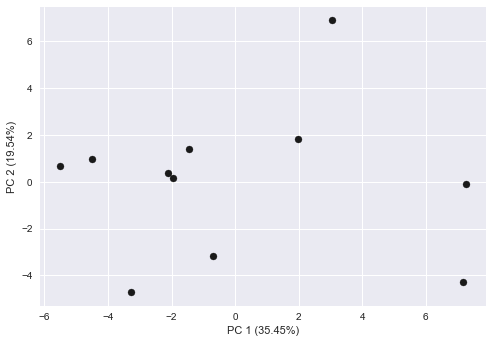

In [319]:
plt.scatter(p[0:11,0], y=p[0:11,1], color='k')
plt.xlabel('PC 1 (%.2f%%)' % (pca.explained_variance_ratio_[0]*100))
plt.ylabel('PC 2 (%.2f%%)' % (pca.explained_variance_ratio_[1]*100))

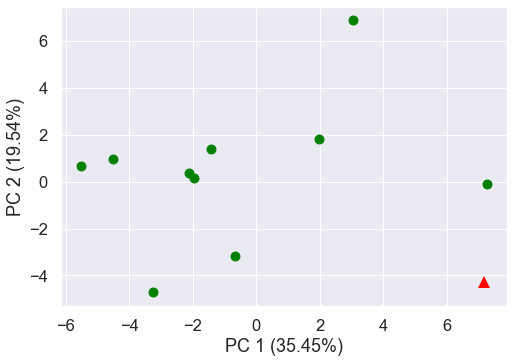

In [472]:
fig = matplotlib.pyplot.figure()

p=pca.fit_transform(X)
plt.scatter(p[0:10,0], p[0:10,1],color='green',s=80)
plt.plot(p[10,0], p[10,1],"red", marker="^", markersize=(12))
plt.xlabel('PC 1 (%.2f%%)' % (pca.explained_variance_ratio_[0]*100), fontsize=18)
plt.ylabel('PC 2 (%.2f%%)' % (pca.explained_variance_ratio_[1]*100), fontsize=18)

plt.savefig('pca1plot.png',bbox_inches = 'tight')

In [320]:
X1=ass2[features2]
X2=X1[1:11].values
X2

array([[3, 5, 7, 9, 2, 4, 6, 8],
       [3, 5, 7, 1, 4, 6, 8, 9],
       [4, 9, 6, 5, 6, 9, 4, 1],
       [8, 3, 7, 4, 6, 1, 5, 9],
       [5, 3, 1, 8, 6, 4, 7, 0],
       [5, 6, 9, 3, 1, 4, 7, 9],
       [2, 4, 8, 6, 2, 4, 8, 2],
       [3, 4, 6, 7, 9, 2, 5, 8],
       [1, 4, 3, 6, 5, 8, 7, 9],
       [0, 0, 2, 3, 4, 1, 3, 1]])

In [321]:
y1=X[1:11]["V1"].values
y1

array([1, 2, 1, 2, 2, 2, 1, 1, 2, 2])

In [322]:
scaler=StandardScaler()
scaler.fit(X2)
X3=scaler.transform(X2)
X3

array([[-0.18569534,  0.31917253,  0.55167728,  1.61155897, -1.09108945,
        -0.11668648,  0.        ,  0.63157895],
       [-0.18569534,  0.31917253,  0.55167728, -1.78119675, -0.21821789,
         0.66122337,  1.24034735,  0.89473684],
       [ 0.27854301,  2.14301554,  0.15762208, -0.08481889,  0.65465367,
         1.82808813, -1.24034735, -1.21052632],
       [ 2.13549639, -0.59274898,  0.55167728, -0.50891336,  0.65465367,
        -1.28355124, -0.62017367,  0.89473684],
       [ 0.74278135, -0.59274898, -1.81265393,  1.1874645 ,  0.65465367,
        -0.11668648,  0.62017367, -1.47368421],
       [ 0.74278135,  0.77513328,  1.33978769, -0.93300782, -1.52752523,
        -0.11668648,  0.62017367,  0.89473684],
       [-0.64993368, -0.13678823,  0.94573249,  0.33927557, -1.09108945,
        -0.11668648,  1.24034735, -0.94736842],
       [-0.18569534, -0.13678823,  0.15762208,  0.76337004,  1.96396101,
        -0.89459632, -0.62017367,  0.63157895],
       [-1.11417203, -0.13678823

In [323]:
lda=LDA()
lda.fit(X2,y1)

LinearDiscriminantAnalysis()

In [324]:
lda.scalings_

array([[ 1.34015692],
       [ 0.04594355],
       [-2.81589019],
       [-1.73233665],
       [-1.13145819],
       [-0.30947007],
       [ 0.7435783 ],
       [ 0.71911741]])

In [325]:
lda.explained_variance_ratio_

array([1.])

In [326]:
y_pred=lda.fit(X2,y1).predict(X2)
y_pred

array([1, 2, 1, 2, 2, 2, 1, 1, 2, 2])

In [327]:
y_predprob=lda.fit(X2,y1).predict_proba(X2)
y_predprob

array([[1.00000000e+00, 9.38706861e-29],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.58168544e-36],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 7.25061432e-39],
       [1.00000000e+00, 9.62601094e-39],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00]])

In [328]:
p, X2, y1

(array([[-1.95799266,  0.17060733,  4.39471771,  1.12672514, -0.01321026,
          0.75859101,  0.78424358,  0.68951322, -0.30759525],
        [-2.10976316,  0.35084703, -0.81030226, -0.59357009,  4.52578423,
         -1.22585137, -1.43815628,  0.06889517, -0.13990386],
        [-4.50588842,  0.94442212,  0.07548399,  2.50019264, -2.65299954,
          0.79917046,  0.93542225, -0.44943466, -0.03001017],
        [ 3.05294263,  6.87230287, -0.96852987, -2.69130314, -2.79566222,
         -1.41022276, -0.59113789,  0.22177963, -0.02510858],
        [-3.26589053, -4.71331162, -2.07853872, -3.27473476, -1.72348785,
          1.22102676, -0.55642234,  0.62684818,  0.16212006],
        [ 7.25873188, -0.07980499,  0.73401667, -2.18611467,  1.10187513,
          3.26576524, -0.04690348, -0.46547212, -0.06365251],
        [-5.50843498,  0.64796889, -3.73158566,  1.21546061, -0.10108325,
          0.64881656, -0.8597054 , -0.47484724, -0.09847998],
        [ 1.98262213,  1.83785836, -3.61251606, 

In [329]:
newob=[2,3,4,5,6,7,8,9]
lda.predict([newob])

array([2])

In [330]:
lda.predict_proba([newob])

array([[0., 1.]])

In [44]:
rubies=pd.read_csv("rubies.csv")
rubies

,Unnamed: 0,where,price,color,diameter,thickness,angle,cut,clarity,caratwt
0,1,1,440,4,21.0,7.56,27.25,5,0.444,1.095
1,2,1,450,4,21.9,7.16,30.25,5,0.459,0.950
2,3,1,325,3,19.9,5.22,29.00,3,0.393,0.785
3,4,1,920,5,23.1,4.86,22.25,7,0.492,0.970
4,5,1,430,4,21.2,4.92,21.50,5,0.450,0.863
...,...,...,...,...,...,...,...,...,...,...
71,72,3,290,4,21.4,4.94,33.50,2,0.456,0.829
72,73,3,240,3,19.8,4.82,27.00,3,0.438,0.850
73,74,3,285,3,20.0,3.56,27.00,2,0.417,0.750
74,75,3,250,3,20.1,4.80,27.50,2,0.447,0.939


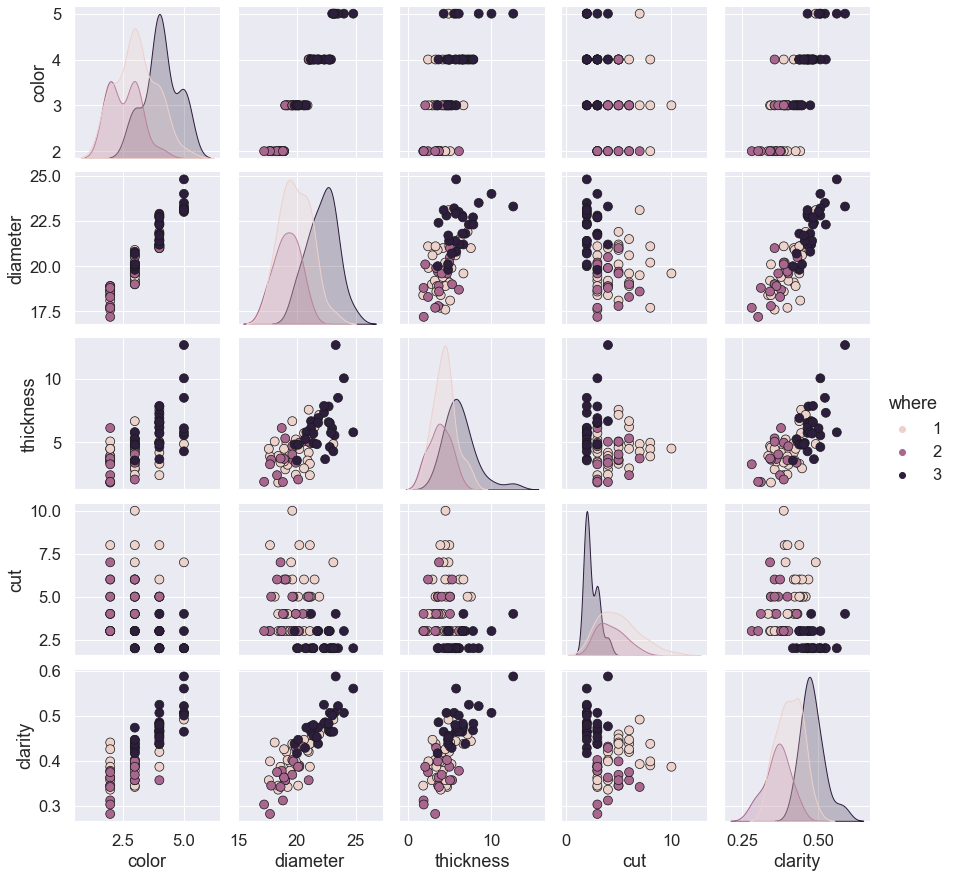

In [474]:
sns.color_palette("Accent")
sns.set_context("paper", rc={"axes.labelsize":32})
sns.set(font_scale = 1.5)
ax = sns.pairplot(rubies,
            x_vars=["color","diameter","thickness","cut","clarity"],
            y_vars=["color","diameter","thickness","cut","clarity"],
            hue = "where", plot_kws={'s':80, 'edgecolor':'k'},
)
ax.savefig('pairplot.png',bbox_inches='tight')

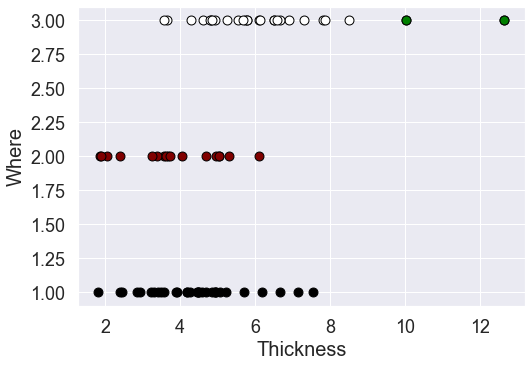

In [504]:
color = ["Black","maroon","White","green"]
plt.scatter(x="thickness",y="where",data=r1, c=color[0], s=80,edgecolors='black')
plt.scatter(x="thickness",y="where",data=r2, c=color[1], s=80,edgecolors='black')
plt.scatter(x="thickness",y="where",data=r3, c=color[2], s=80,edgecolors='black')
plt.scatter(x=10.04,y=3, c=color[3], s=80,edgecolors='black')
plt.scatter(x=12.66,y=3, c=color[3], s=80,edgecolors='black')
plt.xlabel("Thickness",fontsize=20)
plt.ylabel("Where", fontsize=20)
plt.xticks(fontsize=18 )
plt.yticks(fontsize= 18)
plt.savefig('outliersplot.png',bbox_inches = 'tight')

In [428]:
r1=rubies.loc[rubies["where"]==1]

In [265]:
rubies.loc[rubies["where"]==1].describe()

,Unnamed: 0,where,price,color,diameter,thickness,angle,cut,clarity,caratwt
count,32.000000,32.0,32.000000,32.000000,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000
mean,16.500000,1.0,391.250000,3.062500,19.887500,4.384375,24.523438,5.00000,0.406500,0.926719
std,9.380832,0.0,151.220838,0.800705,1.294093,1.329591,5.937972,1.84915,0.040794,0.130318
min,1.000000,1.0,245.000000,2.000000,17.600000,1.820000,12.250000,3.00000,0.336000,0.700000
25%,8.750000,1.0,296.250000,2.750000,18.975000,3.460000,20.875000,3.00000,0.384750,0.852500
50%,16.500000,1.0,327.500000,3.000000,19.750000,4.470000,24.000000,5.00000,0.400500,0.901000
75%,24.250000,1.0,450.000000,4.000000,21.000000,4.945000,28.312500,6.00000,0.438750,1.022500
max,32.000000,1.0,920.000000,5.000000,23.100000,7.560000,39.500000,10.00000,0.492000,1.217000


In [429]:
r2=rubies.loc[rubies["where"]==2]

In [878]:
rubies.loc[rubies["where"]==2].describe()

,Unnamed: 0,where,price,color,diameter,thickness,angle,cut,clarity,caratwt
count,17.000000,17.0,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,41.000000,2.0,288.529412,2.588235,19.152941,3.801176,21.338235,4.294118,0.365824,0.876941
std,5.049752,0.0,90.394357,0.618347,1.051260,1.272114,5.625654,1.263166,0.041045,0.122880
min,33.000000,2.0,195.000000,2.000000,17.200000,1.860000,13.250000,3.000000,0.282000,0.660000
25%,37.000000,2.0,245.000000,2.000000,18.600000,3.260000,17.750000,3.000000,0.345000,0.785000
50%,41.000000,2.0,265.000000,3.000000,19.000000,3.680000,20.500000,4.000000,0.369000,0.895000
75%,45.000000,2.0,300.000000,3.000000,19.900000,4.960000,24.500000,5.000000,0.387000,0.925000
max,49.000000,2.0,550.000000,4.000000,21.000000,6.120000,32.250000,7.000000,0.432000,1.110000


In [430]:
r3=rubies.loc[rubies["where"]==3]

In [880]:
rubies.loc[rubies["where"]==3].describe()

,Unnamed: 0,where,price,color,diameter,thickness,angle,cut,clarity,caratwt
count,27.000000,27.0,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,63.000000,3.0,335.555556,4.074074,22.137037,6.256296,34.074074,2.444444,0.480778,0.968111
std,7.937254,0.0,87.840911,0.675160,1.241633,1.946018,7.133620,0.640513,0.038379,0.125319
min,50.000000,3.0,240.000000,3.000000,19.800000,3.560000,26.500000,2.000000,0.417000,0.750000
25%,56.500000,3.0,290.000000,4.000000,21.300000,4.890000,27.750000,2.000000,0.460500,0.873000
50%,63.000000,3.0,310.000000,4.000000,22.300000,5.800000,35.000000,2.000000,0.474000,0.970000
75%,69.500000,3.0,367.500000,4.500000,22.950000,6.780000,37.250000,3.000000,0.504000,1.045500
max,76.000000,3.0,690.000000,5.000000,24.800000,12.660000,53.500000,4.000000,0.588000,1.279000


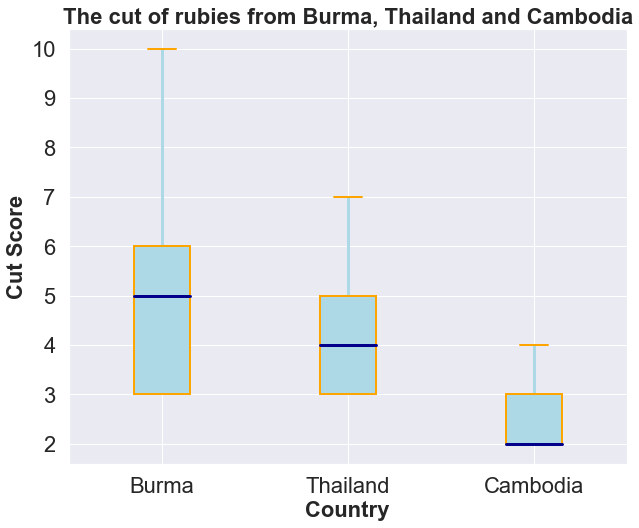

In [340]:
data1=r1[variability]["cut"]
data2=r2[variability]["cut"]
data3=r3[variability]["cut"]
data = [data1,data2,data3]

fig = plt.figure(1, figsize=(10, 8))
ax = fig.add_subplot(111)
bp = ax.boxplot(data, patch_artist=True)
for box in bp['boxes']:
    box.set( color='orange', linewidth=2)
    box.set( facecolor = 'lightblue' )

for whisker in bp['whiskers']:
    whisker.set(color='lightblue', linewidth=3)
for cap in bp['caps']:
    cap.set(color='orange', linewidth=2)
for median in bp['medians']:
    median.set(color='darkblue', linewidth=3)
for flier in bp['fliers']:
    flier.set(marker='o', color='blue', alpha=1)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(22) 
ax.set_xticklabels(['Burma', 'Thailand', 'Cambodia'],fontsize=22)
ax.set_title('The cut of rubies from Burma, Thailand and Cambodia',fontsize=22,fontweight='bold')
ax.set_xlabel('Country',fontsize=22, fontweight='bold')
ax.set_ylabel('Cut Score',fontsize=22, fontweight='bold')
plt.savefig('Cutplot.png')

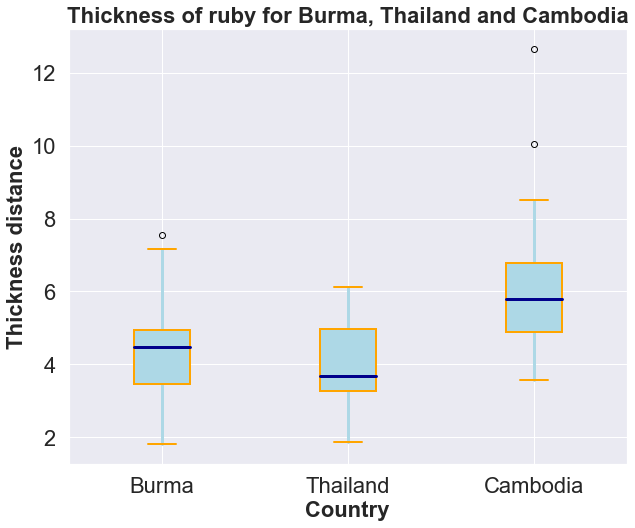

In [339]:
data1=r1[variability]["thickness"]
data2=r2[variability]["thickness"]
data3=r3[variability]["thickness"]
data = [data1,data2,data3]

fig = plt.figure(1, figsize=(10, 8))
ax = fig.add_subplot(111)
bp = ax.boxplot(data, patch_artist=True)
for box in bp['boxes']:
    box.set( color='orange', linewidth=2)
    box.set( facecolor = 'lightblue' )

for whisker in bp['whiskers']:
    whisker.set(color='lightblue', linewidth=3)
for cap in bp['caps']:
    cap.set(color='orange', linewidth=2)
for median in bp['medians']:
    median.set(color='darkblue', linewidth=3)
for flier in bp['fliers']:
    flier.set(marker='o', color='blue', alpha=1)
ax.set_xticklabels(['Burma', 'Thailand', 'Cambodia'],fontsize=22)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(22) 
ax.set_title('Thickness of ruby for Burma, Thailand and Cambodia',fontsize=22,fontweight='bold')
ax.set_xlabel('Country',fontsize=22, fontweight='bold')
ax.set_ylabel('Thickness distance',fontsize=22, fontweight='bold')
plt.savefig('thicknessplot.png')

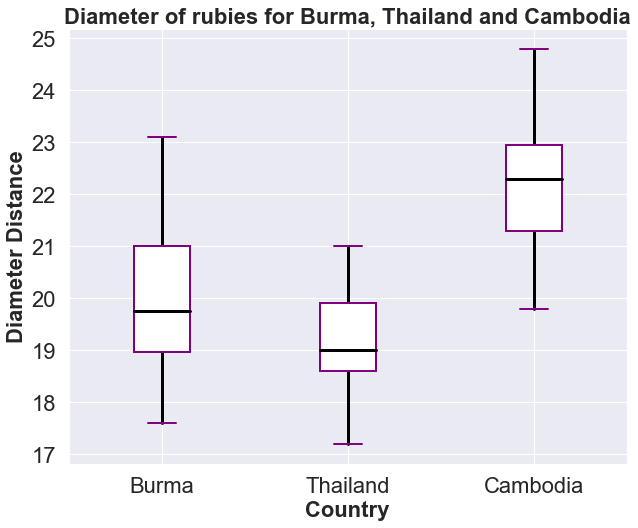

In [336]:
data1=r1[variability]["diameter"]
data2=r2[variability]["diameter"]
data3=r3[variability]["diameter"]
data = [data1,data2,data3]

fig = plt.figure(1, figsize=(10, 8))
ax = fig.add_subplot(111)
bp = ax.boxplot(data, patch_artist=True)
for box in bp['boxes']:
    box.set( color='purple', linewidth=2)
    box.set( facecolor = 'white' )

for whisker in bp['whiskers']:
    whisker.set(color='black', linewidth=3)
for cap in bp['caps']:
    cap.set(color='purple', linewidth=2)
for median in bp['medians']:
    median.set(color='black', linewidth=3)
for flier in bp['fliers']:
    flier.set(marker='o', color='purple', alpha=1)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(22) 
ax.set_xticklabels(['Burma', 'Thailand', 'Cambodia'],fontsize=22)
ax.set_title('Diameter of rubies for Burma, Thailand and Cambodia',fontsize=22,fontweight='bold')
ax.set_xlabel('Country',fontsize=22, fontweight='bold')
ax.set_ylabel('Diameter Distance',fontsize=22, fontweight='bold')
plt.savefig('diameterplot.png')

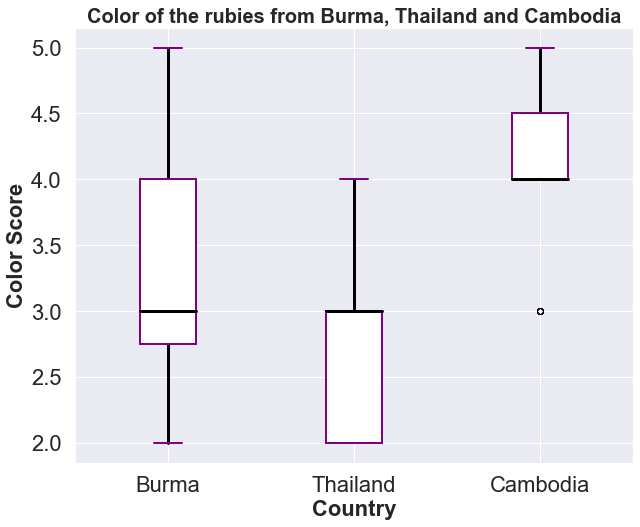

In [337]:
data1=r1[variability]["color"]
data2=r2[variability]["color"]
data3=r3[variability]["color"]
data = [data1,data2,data3]

fig = plt.figure(1, figsize=(10, 8))
ax = fig.add_subplot(111)
bp = ax.boxplot(data, patch_artist=True)
for box in bp['boxes']:
    box.set( color='purple', linewidth=2)
    box.set( facecolor = 'white' )

for whisker in bp['whiskers']:
    whisker.set(color='black', linewidth=3)
for cap in bp['caps']:
    cap.set(color='purple', linewidth=2)
for median in bp['medians']:
    median.set(color='black', linewidth=3)
for flier in bp['fliers']:
    flier.set(marker='o', color='purple', alpha=1)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(22) 
ax.set_xticklabels(['Burma', 'Thailand', 'Cambodia'],fontsize=22)
ax.set_title('Color of the rubies from Burma, Thailand and Cambodia',fontsize=20,fontweight='bold')
ax.set_xlabel('Country',fontsize=22, fontweight='bold')
ax.set_ylabel('Color Score',fontsize=22, fontweight='bold')
plt.savefig('colorplot.png')

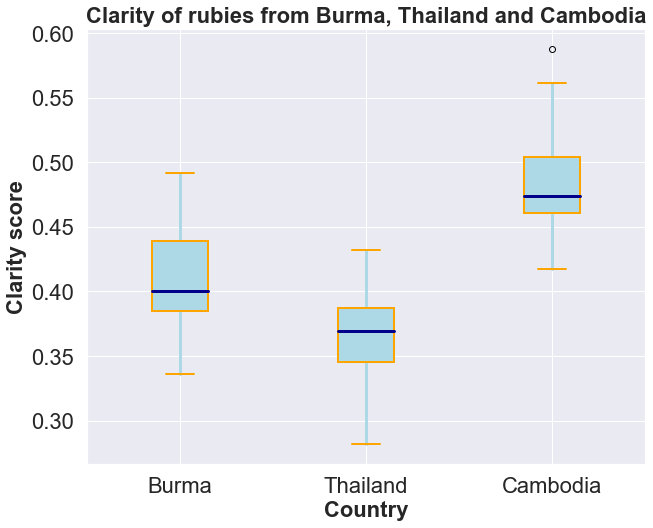

In [338]:
data1=r1[variability]["clarity"]
data2=r2[variability]["clarity"]
data3=r3[variability]["clarity"]
data = [data1,data2,data3]

fig = plt.figure(1, figsize=(10, 8))
ax = fig.add_subplot(111)
bp = ax.boxplot(data, patch_artist=True)
for box in bp['boxes']:
    box.set( color='orange', linewidth=2)
    box.set( facecolor = 'lightblue' )

for whisker in bp['whiskers']:
    whisker.set(color='lightblue', linewidth=3)
for cap in bp['caps']:
    cap.set(color='orange', linewidth=2)
for median in bp['medians']:
    median.set(color='darkblue', linewidth=3)
for flier in bp['fliers']:
    flier.set(marker='o', color='blue', alpha=1)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(22) 
ax.set_xticklabels(['Burma', 'Thailand', 'Cambodia'],fontsize=22)
ax.set_title('Clarity of rubies from Burma, Thailand and Cambodia',fontsize=22,fontweight='bold')
ax.set_xlabel('Country',fontsize=22, fontweight='bold')
ax.set_ylabel('Clarity score',fontsize=22, fontweight='bold')
plt.savefig('clarityplot.png')

In [431]:
var=rubies.T.index
var

Index(['Unnamed: 0', 'where', 'price', 'color', 'diameter', 'thickness',
       'angle', 'cut', 'clarity', 'caratwt'],
      dtype='object')

In [1]:
variability=["color","diameter","thickness","angle","cut","clarity","caratwt"]
V=rubies[variability]
V

NameError: name 'rubies' is not defined

In [433]:
c1=rubies['where'].values
c1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [434]:
scaler=StandardScaler()
scaler.fit(V)
V_sc=scaler.transform(V)

In [435]:
pca=PCA()
pca.fit(V_sc)

PCA()

In [436]:
pca.explained_variance_ratio_

array([0.58867113, 0.19101847, 0.10591179, 0.0602036 , 0.0265437 ,
       0.02092891, 0.00672239])

In [347]:
np.cumsum(pca.explained_variance_ratio_)

array([0.58867113, 0.7796896 , 0.8856014 , 0.945805  , 0.9723487 ,
       0.99327761, 1.        ])

In [437]:
pca.components_

array([[ 0.4339569 ,  0.44993132,  0.41232559,  0.35556181, -0.1867048 ,
         0.45285382,  0.26994696],
       [ 0.00772821, -0.04279022,  0.12983655, -0.31550779,  0.71471936,
         0.10131509,  0.60051483],
       [-0.45234503, -0.41570891,  0.45029241,  0.56827313, -0.03873196,
        -0.17665043,  0.25331192],
       [ 0.2428179 ,  0.11335647,  0.24747874,  0.31478743,  0.61811707,
        -0.21576938, -0.58243265],
       [ 0.14299538,  0.06587066, -0.71934339,  0.57936738,  0.16023789,
        -0.10953536,  0.29054729],
       [ 0.434144  ,  0.07223418,  0.17706072, -0.12780009, -0.2080172 ,
        -0.79928778,  0.27656055],
       [-0.58233705,  0.77492612,  0.0177676 , -0.0023974 ,  0.04244214,
        -0.23672329,  0.04703601]])

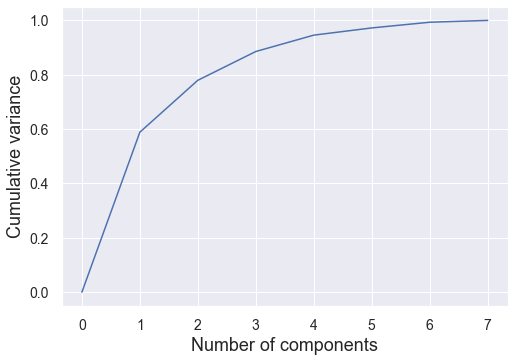

In [438]:
cumexp=np.concatenate([[0],pca.explained_variance_ratio_])
plt.plot(np.cumsum(cumexp))
plt.xlabel("Number of components", fontsize=18)
plt.ylabel("Cumulative variance",fontsize=18)
plt.xticks(fontsize=14 )
plt.yticks(fontsize= 14)
plt.savefig('cvplot.png',bbox_inches = 'tight')

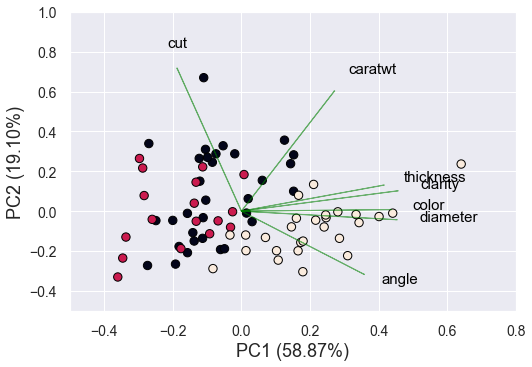

In [496]:
p=pca.fit_transform(V_sc)

plt.xlim(-0.5,0.8)
plt.ylim(-0.5,1)
plt.xlabel('PC1 (%.2f%%)' % (pca.explained_variance_ratio_[0]*100), fontsize=18)
plt.ylabel('PC2 (%.2f%%)' % (pca.explained_variance_ratio_[1]*100), fontsize=18)
x=p[:,0]
y=p[:,1]
coeff=np.transpose(pca.components_[0:2,:])
n=V.shape[1]
scalex=1.0/(x.max()-x.min())
scaley=1.0/(y.max()-y.min())
plt.scatter(x*scalex,y*scaley,c=c1,s=70, edgecolors='black')
for i in range(n):
    plt.arrow(0,0,coeff[i,0],coeff[i,1],color="green",alpha=0.5)
    plt.text(coeff[i,0]*1.15,coeff[i,1]*1.15,variability[i],color="black",fontsize=15)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.savefig('pca2plot.png',bbox_inches = 'tight')

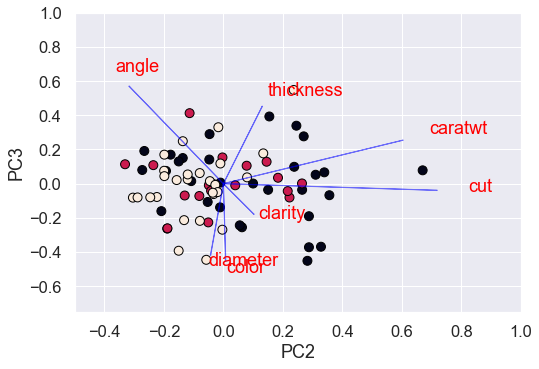

In [442]:
p=pca.fit_transform(V_sc)
plt.xlim(-0.5,1)
plt.ylim(-0.75,1)
plt.xlabel("PC2")
plt.ylabel("PC3")
x=p[:,1]
y=p[:,2]
coeff=np.transpose(pca.components_[0:3,:])
n=V.shape[1]
scalex=1.0/(x.max()-x.min())
scaley=1.0/(y.max()-y.min())
plt.scatter(x*scalex,y*scaley,c=c1,s=80,edgecolors='black')
for i in range(n):
    plt.arrow(0,0,coeff[i,1],coeff[i,2],color="blue",alpha=0.5)
    plt.text(coeff[i,1]*1.15,coeff[i,2]*1.15,variability[i],color="red")

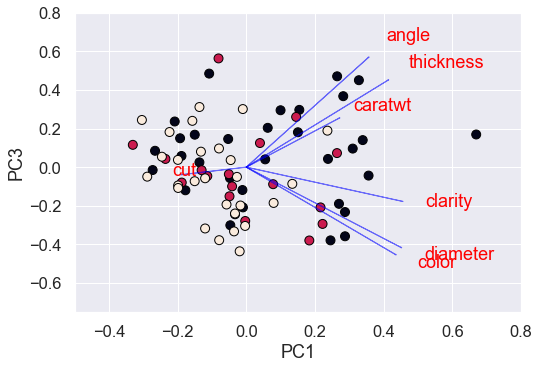

In [425]:
p=pca.fit_transform(V_sc)
plt.xlim(-0.5,0.8)
plt.ylim(-0.75,0.8)
plt.xlabel("PC1")
plt.ylabel("PC3")
x=p[:,1]
y=p[:,3]
coeff=np.transpose(pca.components_[0:3,:])
n=V.shape[1]
scalex=1.0/(x.max()-x.min())
scaley=1.0/(y.max()-y.min())
plt.scatter(x*scalex,y*scaley,c=c1,s=80,edgecolors='black')
for i in range(n):
    plt.arrow(0,0,coeff[i,0],coeff[i,2],color="blue",alpha=0.5)
    plt.text(coeff[i,0]*1.15,coeff[i,2]*1.15,variability[i],color="red")

In [353]:
logreg=LogisticRegression(max_iter=5000)
logreg.fit(V,c1)
logreg.coef_,logreg.intercept_

(array([[-1.71418381e-02, -2.17896405e-01, -2.27404372e-01,
         -8.63476785e-03,  9.44582485e-01,  1.39318433e-01,
          1.36139014e-01],
        [-3.38205841e-01, -5.29326636e-01, -5.81972118e-02,
         -1.82070641e-01,  4.51353790e-01, -2.40045083e-01,
         -1.36045384e-01],
        [ 3.55347679e-01,  7.47223040e-01,  2.85601584e-01,
          1.90705409e-01, -1.39593628e+00,  1.00726650e-01,
         -9.36308042e-05]]),
 array([  3.21726418,  15.48189721, -18.69916139]))

In [354]:
rubies2=rubies[rubies["where"]<3]
V2=rubies2[variability]

In [355]:
c2=rubies2['where'].values

In [356]:
c2_pred=logreg.predict(V2)
c2_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2])

In [357]:
c2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2])

In [358]:
logreg.predict_proba(V2)

array([[8.26543861e-01, 1.18872436e-01, 5.45837035e-02],
       [7.69177710e-01, 4.80200481e-02, 1.82802242e-01],
       [4.60811438e-01, 1.90213801e-01, 3.48974761e-01],
       [9.69361535e-01, 3.00254203e-02, 6.13044697e-04],
       [7.96280330e-01, 1.98320257e-01, 5.39941305e-03],
       [5.63557312e-01, 2.87439135e-01, 1.49003553e-01],
       [7.62986302e-01, 6.42021148e-02, 1.72811583e-01],
       [8.93448162e-01, 1.04502522e-01, 2.04931622e-03],
       [8.58957679e-01, 1.36692932e-01, 4.34938989e-03],
       [9.72773233e-01, 1.91434694e-02, 8.08329711e-03],
       [3.95530890e-01, 3.79824491e-01, 2.24644619e-01],
       [5.71503565e-01, 9.81392719e-02, 3.30357164e-01],
       [8.15745484e-01, 1.84253542e-01, 9.74246843e-07],
       [9.36669707e-01, 6.33284588e-02, 1.83379228e-06],
       [9.00241570e-01, 7.41153220e-02, 2.56431083e-02],
       [9.52886832e-01, 4.71131627e-02, 4.96033601e-09],
       [6.44085578e-01, 3.55887225e-01, 2.71969409e-05],
       [3.78872996e-01, 6.20615

In [359]:
score=logreg.score(V2,c2) #overall accuracy of the prediction
score

0.7755102040816326

In [360]:
from sklearn import metrics
cm=metrics.confusion_matrix(c2,c2_pred) 
cm

array([[28,  4],
       [ 7, 10]])

In [361]:
lda=LDA()
lda.fit(V,c1)

LinearDiscriminantAnalysis()

In [362]:
c1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [363]:
c1_pred=lda.fit(V,c1).predict(V)
c1_pred

array([1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 3, 3, 3])

In [364]:
abs(c1-c1_pred)

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0])

In [365]:
cm2=metrics.confusion_matrix(c1,c1_pred) 
cm2

array([[26,  5,  1],
       [ 9,  8,  0],
       [ 1,  0, 26]])

In [366]:
c1_predprob=lda.fit(V,c1).predict_proba(V)
c1_predprob

array([[7.47360789e-01, 2.06220027e-01, 4.64191843e-02],
       [6.07681362e-01, 4.99097928e-02, 3.42408845e-01],
       [6.08112924e-01, 3.00768394e-01, 9.11186815e-02],
       [9.50760324e-01, 6.61961081e-03, 4.26200648e-02],
       [9.04472218e-01, 5.27105346e-02, 4.28172474e-02],
       [2.46534161e-01, 7.52072319e-01, 1.39351943e-03],
       [8.49619889e-01, 4.49848326e-02, 1.05395278e-01],
       [8.91428256e-01, 7.59981878e-02, 3.25735564e-02],
       [4.52253842e-01, 5.47316996e-01, 4.29162021e-04],
       [9.63156369e-01, 9.30565667e-03, 2.75379739e-02],
       [3.33879508e-01, 1.96291933e-01, 4.69828559e-01],
       [7.81035530e-01, 1.47480932e-01, 7.14835387e-02],
       [9.28189017e-01, 7.17211659e-02, 8.98168901e-05],
       [8.89550839e-01, 1.10412436e-01, 3.67254838e-05],
       [9.22841299e-01, 7.38276420e-02, 3.33105898e-03],
       [8.57382817e-01, 1.42616812e-01, 3.71021565e-07],
       [9.18201587e-01, 8.12847168e-02, 5.13695886e-04],
       [1.40559348e-01, 8.59377

Text(0, 0.5, 'LD2')

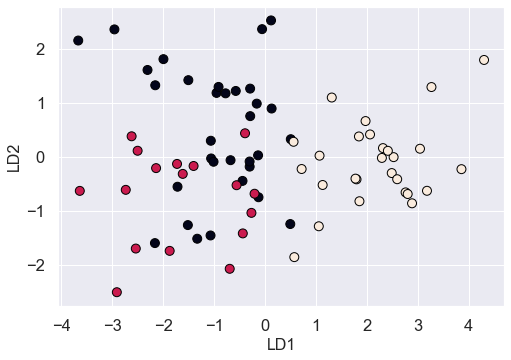

In [383]:
p=lda.fit_transform(V,c1)
plt.scatter(x=p[:,0],y=p[:,1],c=c1,s=80,edgecolors='black')
plt.xlabel("LD1",fontsize=16)
plt.ylabel("LD2",fontsize=16)

In [368]:
nr=[4,20,5.00,32.5,3,0.42,0.900]
lda.predict([nr])

array([1])

In [369]:
lda.predict_proba([nr])

array([[0.77557895, 0.03466543, 0.18975562]])

In [370]:
nr=np.reshape(nr,(1,-1))
nr1=lda.transform(nr)

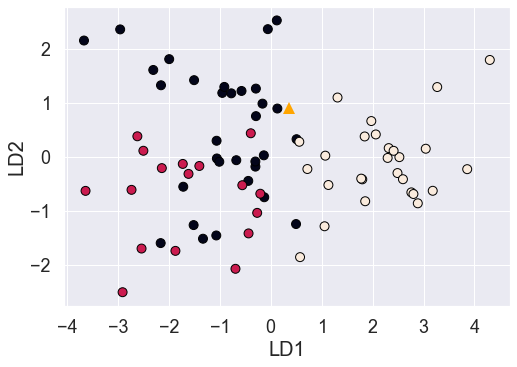

In [470]:
p=lda.fit_transform(V,c1)
ax1 = plt.scatter(x=p[:,0],y=p[:,1],c=c1,s=80,edgecolors='black')
plt.plot(nr1[:,0],nr1[:,1], "^",markersize=12,color="orange")
plt.xlabel("LD1",fontsize=20)
plt.ylabel("LD2",fontsize=20)
plt.xticks(fontsize=18 )
plt.yticks(fontsize= 18)
plt.savefig('ldaplot.png',bbox_inches = 'tight')